In [60]:
%load_ext autoreload
%autoreload 2


import dvu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import clean
import viz

plt.style.use('default')
dvu.set_style()

df = pd.read_pickle('../data/cdis_with_schemas.pkl')

def get_feature_names_list(schema):
    if isinstance(schema, list):
        return [clean.clean_feature_name(s['label_en']) if 'label_en' in s else 'unknown'
                for s in schema]
    else:
        return []

# these seem to be extra info in the calc, not actually a new feature
def remove_unknown(x):
    return [z for z in x if not z == 'unknown']

df['feature_names'] = df['input_schema'].apply(get_feature_names_list)
df['feature_names'] = df['feature_names'].apply(remove_unknown)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Clean the feature names**

In [61]:
feature_names_unique = df['feature_names'].apply(clean.get_clean_unique_feature_names_from_list)
all_words = sum(feature_names_unique, [])  # concatenate all list

all_words = pd.Series(all_words)
# all_words = all_words[~(all_words == 'unknown')] # not necessary, already handleed
counts = all_words.value_counts()

In [62]:
feat_names = pd.Series(counts.index).apply(lambda x: x[:39])
for feat_name in sorted(feat_names):
    print(feat_name)
# print(sorted(feat_names))


 >1 extranodal site
 Age at diagnosis, years (A)
 HLA match group
 Hemophagocytosis features on bone marr
 Motor response
 Pupil response
% alcohol
% bands
% basophils
% myeloblasts in peripheral blood
% neutrophils
% of reticulocytes
&ge;2 sites of metastasis
&gt;3 hrs from symptom onset (or last t
0.45% saline
0.9% saline
1. Anxious mood: Worries, anticipation 
1. Felt low in spirits or sad?
1. I have been less alert.
1. Sleep onset insomnia:
10 . Respiratory symptoms: Pressure or 
10. Concentration/decision making:
10. Dysarthria
10. I have had trouble maintaining phys
100 mEq NaHCO₃ in 1L D5W
10: Dysarthria
10a. Suffered from reduced appetite?
10b. Suffered from increased appetite?
11. Extinction and inattention
11. Gastrointestinal symptoms: Difficul
11. I have had difficulty making decisi
11. Outlook (self):
11: Extinction/inattention
11: Test extinction/inattention/neglect
12. Genitourinary symptoms: Frequency o
12. I have been less motivated to do an
12. Suicidal ideation:
13.

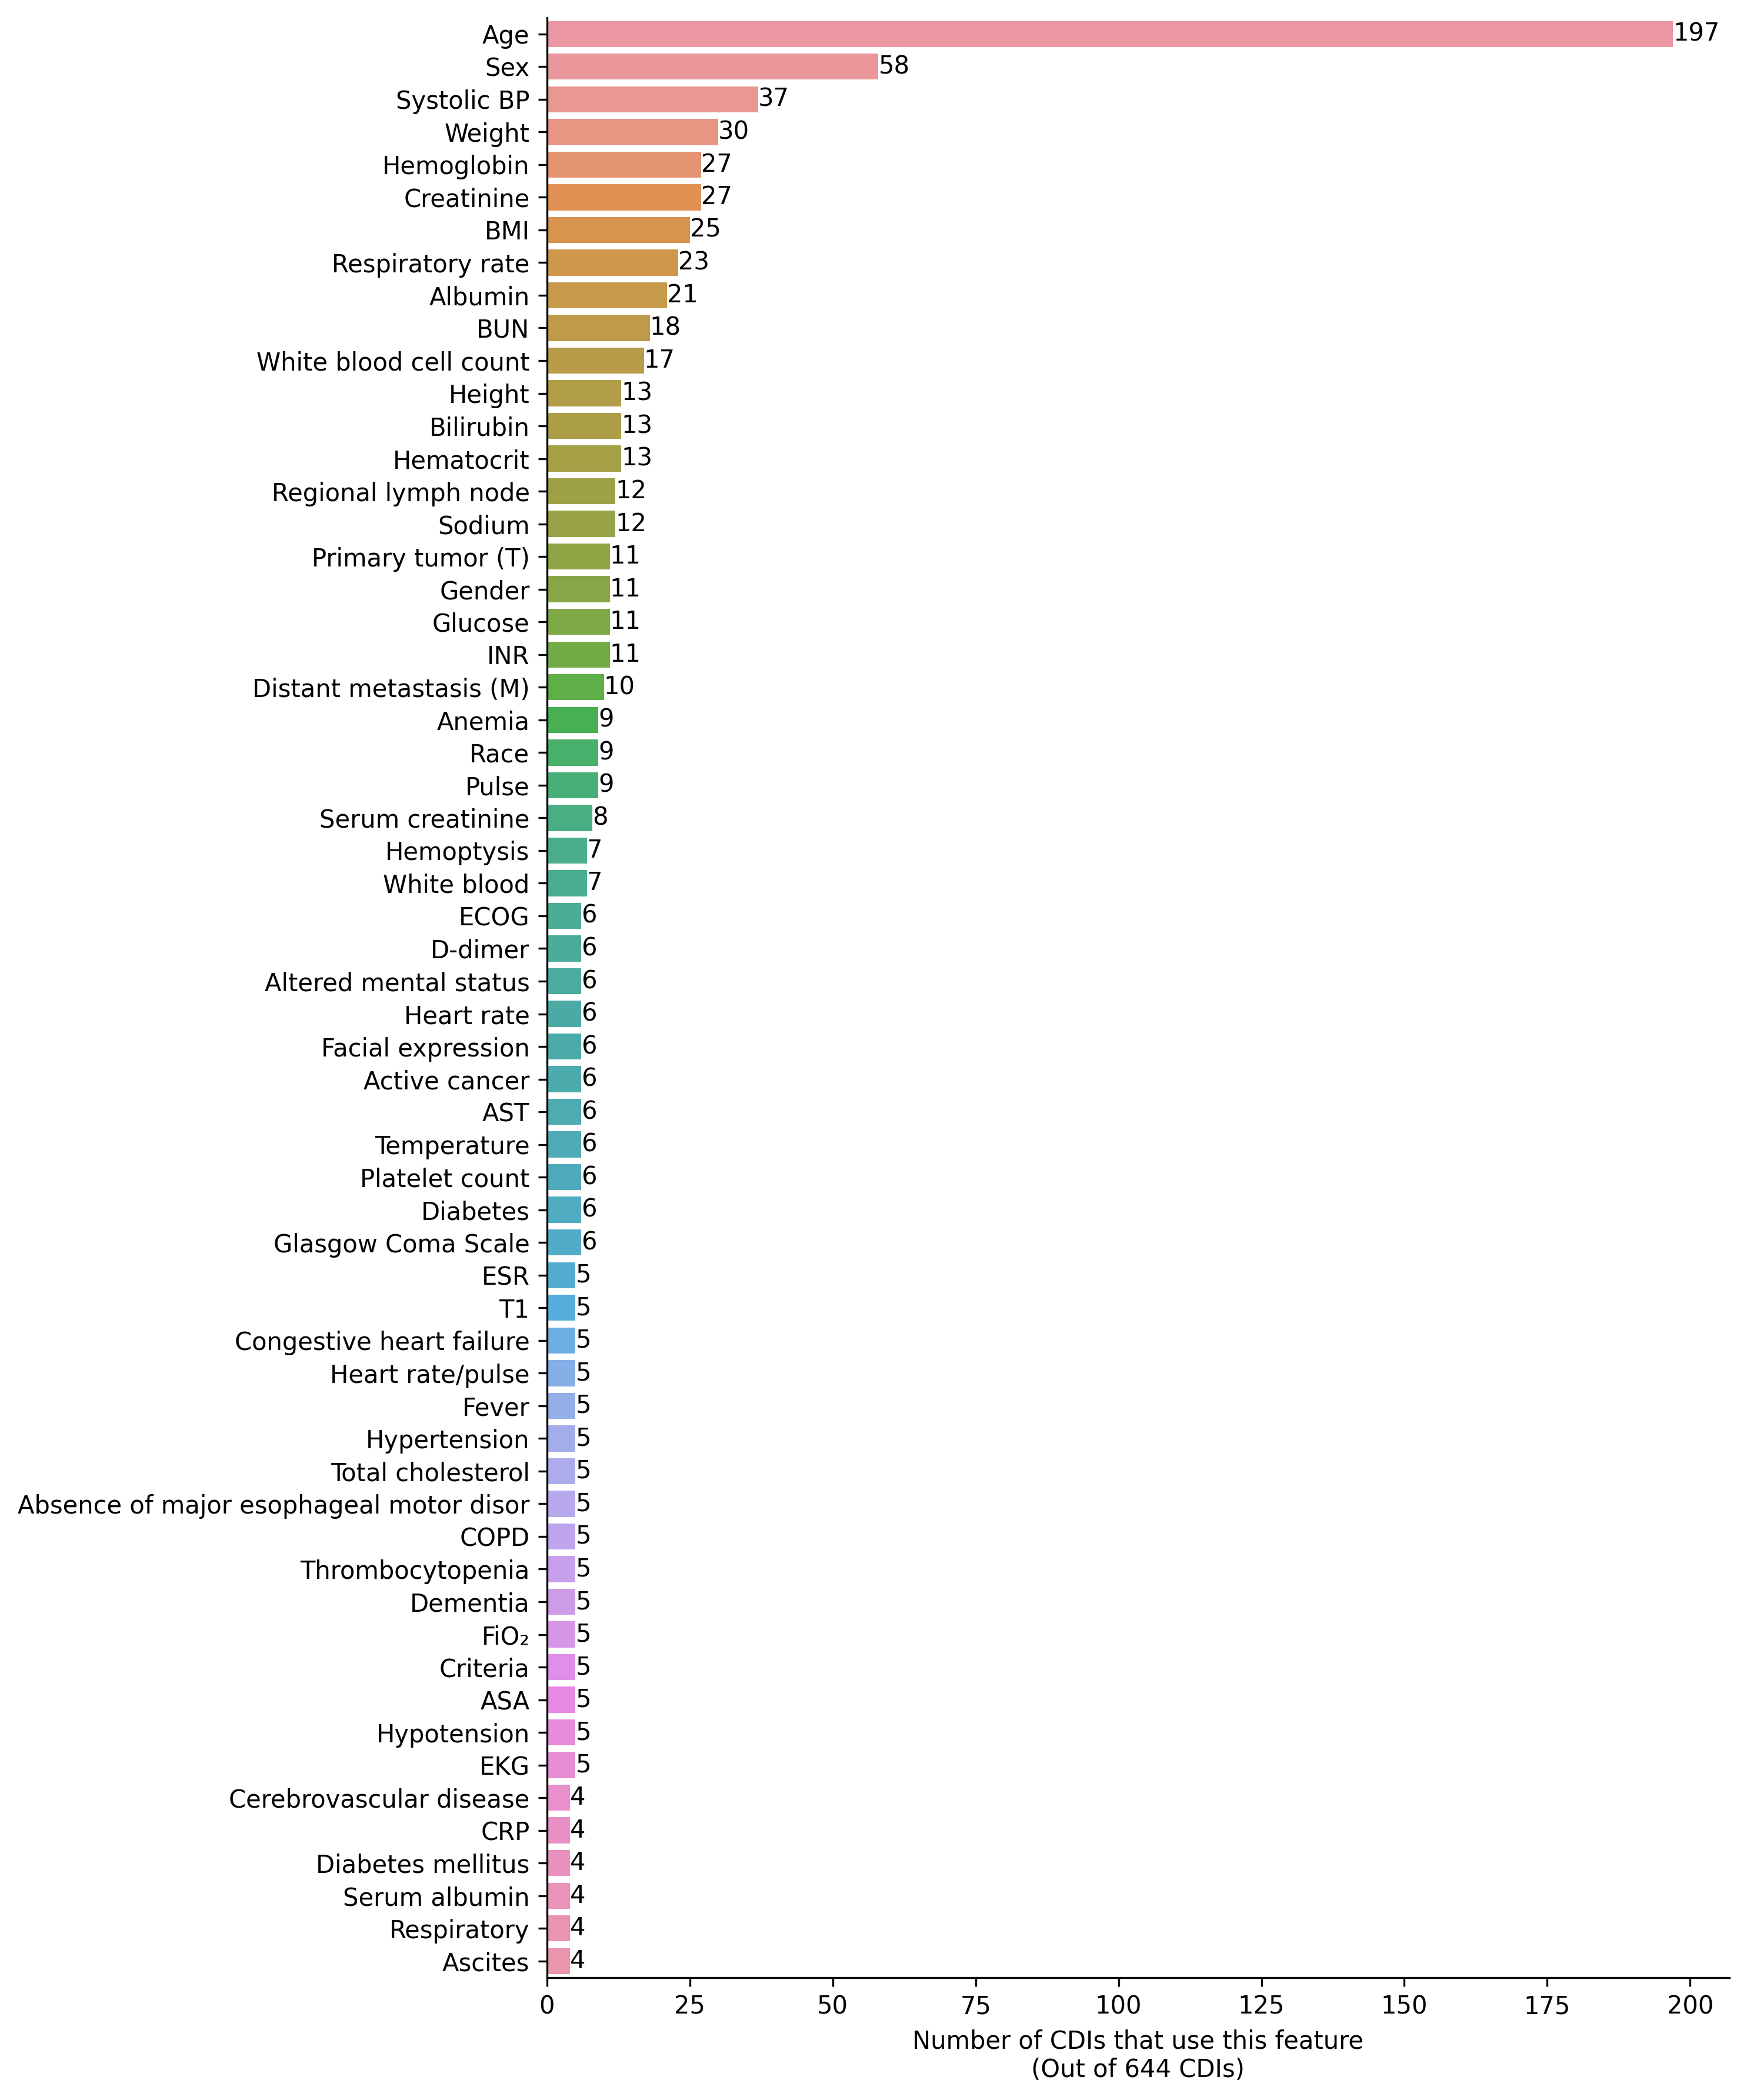

In [63]:
plt.figure(figsize=(10, 12), dpi=300, facecolor='w')
N = 60
# plt.grid()
ax = sns.barplot(y=feat_names[:N],
                 x=counts.values[:N], orient='h')
ax.bar_label(ax.containers[0])
plt.xlabel(f'Number of CDIs that use this feature\n(Out of {df.shape[0]} CDIs)')
plt.tight_layout()
viz.savefig('common_features')

# feature counts

In [64]:
df['num_splits'] = df['feature_names'].apply(len)
df['num_features_unique'] = df['feature_names']\
    .apply(clean.get_clean_unique_feature_names_from_list)\
    .apply(len)

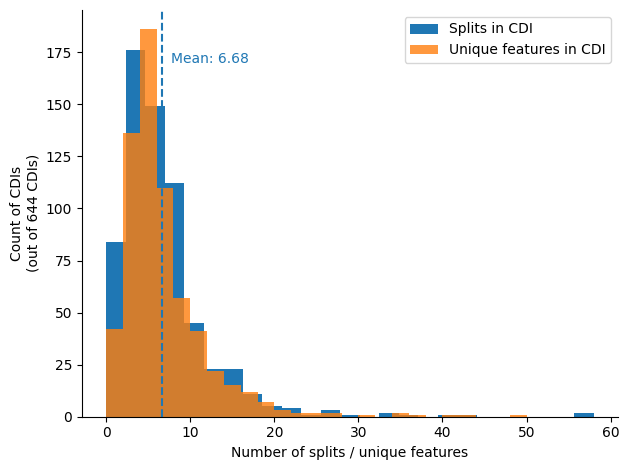

In [65]:
# plt.figure(dpi=300, facecolor='w')
plt.hist(df['num_splits'], label='Splits in CDI', bins=25)
avg = np.mean(df['num_splits'])
plt.axvline(x=avg, ls='--')
plt.text(s=f'Mean: {avg:0.2f}', x=avg + 1, y=170, color='C0')
plt.hist(df['num_features_unique'], label='Unique features in CDI', bins=25, alpha=0.8)
plt.xlabel('Number of splits / unique features')
plt.ylabel('Count of CDIs\n(out of 644 CDIs)')
plt.legend()
viz.savefig('num_rules_hist')
# plt.show()

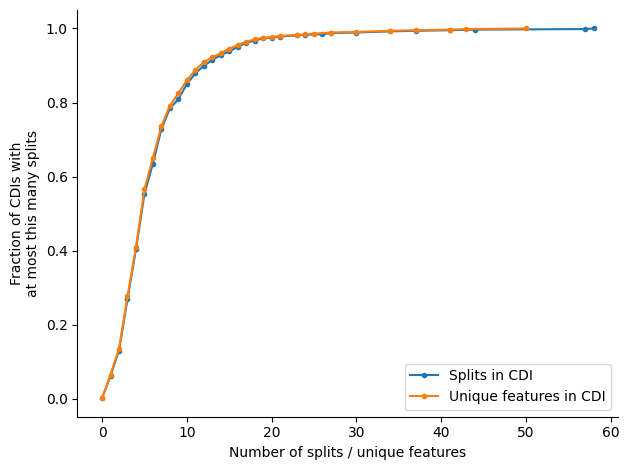

In [66]:
vals, counts = np.unique(df['num_splits'], return_counts=True)
plt.plot(vals, np.cumsum(counts) / np.sum(counts), '.-', label='Splits in CDI')
# val_90 = (np.cumsum(counts) / np.sum(counts)) >= 0.9

# plt.show()
vals, counts = np.unique(df['num_features_unique'], return_counts=True)
plt.plot(vals, np.cumsum(counts) / np.sum(counts), '.-', label='Unique features in CDI')

plt.xlabel('Number of splits / unique features')
plt.ylabel('Fraction of CDIs with\nat most this many splits')
plt.legend()
viz.savefig('num_rules_cdf')
plt.show()